In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('/content/loan_interest_prediction.csv')

In [3]:
df.head(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [5]:
df.shape

(164309, 13)

In [6]:
df.describe()

,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  object 
 1   Length_Employed          156938 non-null  object 
 2   Home_Owner               138950 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 16.3+ MB


In [8]:
df.isna().sum()

Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [9]:
# Print unique values for each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in 'Loan_Amount_Requested':
['7,000' '30,000' '24,725' ... '28,950' '33,325' '29,825']


Unique values in 'Length_Employed':
['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']


Unique values in 'Home_Owner':
['Rent' 'Mortgage' nan 'Own' 'Other']


Unique values in 'Annual_Income':
[68000.      nan 75566.4 ... 51024.  28721.4 24864. ]


Unique values in 'Income_Verified':
['not verified' 'VERIFIED - income' 'VERIFIED - income source']


Unique values in 'Purpose_Of_Loan':
['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']


Unique values in 'Debt_To_Income':
[18.37 14.93 15.88 ... 38.03 39.04 35.06]


Unique values in 'Inquiries_Last_6Mo':
[0 3 1 2 4 5 6 7 8]


Unique values in 'Months_Since_Deliquency':
[ nan  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  2

In [10]:
# Remove commas from 'Loan_Amount_Requested' and convert to numeric
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(',', '').astype(float)

# Print the unique values for 'Loan_Amount_Requested'
print("Unique values in 'Loan_Amount_Requested':")
print(df['Loan_Amount_Requested'].unique())

Unique values in 'Loan_Amount_Requested':
[ 7000. 30000. 24725. ... 28950. 33325. 29825.]


In [11]:
# Function to replace '10+ years' with a random number between 10 and 20
def replace_10plus_years(x):
    if x == '10+ years':
        return np.random.randint(10, 21)
    return x

# Function to replace '< 1 year' with a random number between 0 and 1
def replace_less_than_1_year(x):
    if x == '< 1 year':
        return np.random.randint(0, 2)
    return x

# Apply the functions to the 'Length_Employed' column
df['Length_Employed'] = df['Length_Employed'].apply(replace_10plus_years)
df['Length_Employed'] = df['Length_Employed'].apply(replace_less_than_1_year)

# Convert remaining values to numeric, coercing errors to NaN
df['Length_Employed'] = pd.to_numeric(df['Length_Employed'], errors='coerce')

# Replace NaN values with the median of the column
median_value = df['Length_Employed'].median()
df['Length_Employed'].fillna(median_value, inplace=True)

In [12]:
# Replace nan values with 'Other' in 'Home_Owner' column
df['Home_Owner'] = df['Home_Owner'].fillna('Other')

# Print the unique values in 'Home_Owner' column
print("Unique values in 'Home_Owner':")
print(df['Home_Owner'].unique())

Unique values in 'Home_Owner':
['Rent' 'Mortgage' 'Other' 'Own']


In [13]:
 #Replace 'not verified' with 'NOT VERIFIED' in 'Income_Verified' column
df['Income_Verified'] = df['Income_Verified'].replace('not verified', 'NOT VERIFIED')

In [14]:
# Calculate the median of the 'Annual_Income' column
median_annual_income = df['Annual_Income'].median()

# Replace nan values with the median in the 'Annual_Income' column
df['Annual_Income'] = df['Annual_Income'].fillna(median_annual_income)

# Print the unique values in 'Annual_Income' column
print("Unique values in 'Annual_Income':")
print(df['Annual_Income'].unique())

Unique values in 'Annual_Income':
[68000.  63000.  75566.4 ... 51024.  28721.4 24864. ]


In [15]:
# Calculate the median of the 'Annual_Income' column
median_annual_income = df['Months_Since_Deliquency'].median()

# Replace nan values with the median in the 'Annual_Income' column
df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(median_annual_income)

# Print the unique values in 'Annual_Income' column
print("Unique values in 'Months_Since_Deliquency':")
print(df['Months_Since_Deliquency'].unique())

Unique values in 'Months_Since_Deliquency':
[ 31.  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23.  15.  48.  39.  30.  32.  18.  24.  47.  66.  19.  76.   4.  29.
  45.  38.  56.  37.  20.  35.   2.   9.  34.  14.  59.  36.  50.  81.
  72.  69.  57.  25.   7.  49.  78.  70.  27.   5.  51.  58.  75.  42.
  74.  40.  67.  61.  55.  77.  54.   0.  60.  73.  79.  82.  80.  83.
  88. 127. 106.  99.  97. 139.  96. 119. 116.  94. 141.  86.  91.  84.
  85.  95.  90.  87. 103. 101. 121. 148.  93. 122.  92. 180. 105. 110.
 129. 130. 135. 114. 102. 111.  98. 131. 107. 170.]


In [16]:
# Print unique values for each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in 'Loan_Amount_Requested':
[ 7000. 30000. 24725. ... 28950. 33325. 29825.]


Unique values in 'Length_Employed':
[ 0. 14.  1. 11. 18. 12. 20. 16. 10. 17. 15. 13. 19.]


Unique values in 'Home_Owner':
['Rent' 'Mortgage' 'Other' 'Own']


Unique values in 'Annual_Income':
[68000.  63000.  75566.4 ... 51024.  28721.4 24864. ]


Unique values in 'Income_Verified':
['NOT VERIFIED' 'VERIFIED - income' 'VERIFIED - income source']


Unique values in 'Purpose_Of_Loan':
['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']


Unique values in 'Debt_To_Income':
[18.37 14.93 15.88 ... 38.03 39.04 35.06]


Unique values in 'Inquiries_Last_6Mo':
[0 3 1 2 4 5 6 7 8]


Unique values in 'Months_Since_Deliquency':
[ 31.  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23. 

# **EDA**

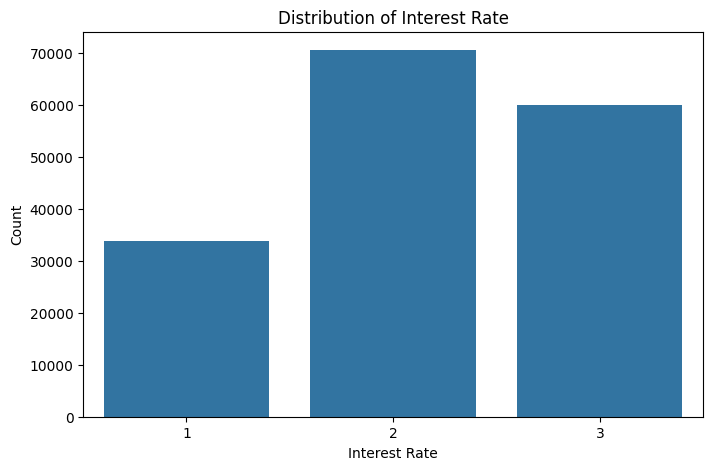

In [17]:
# Distribution of Interest Rate
plt.figure(figsize=(8, 5))
sns.countplot(x='Interest_Rate', data=df)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()

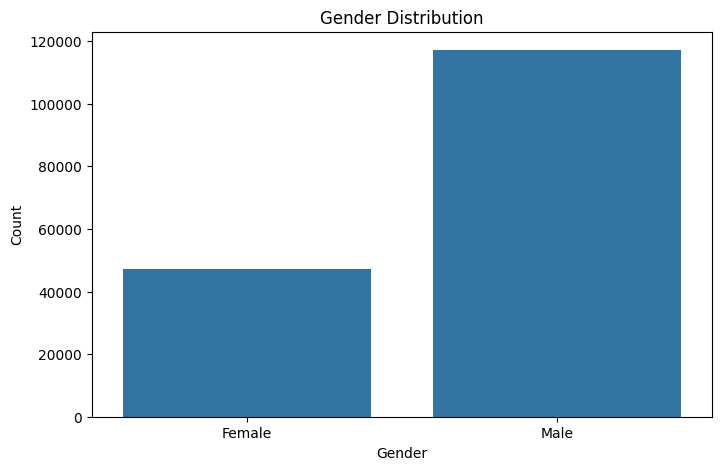

In [18]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

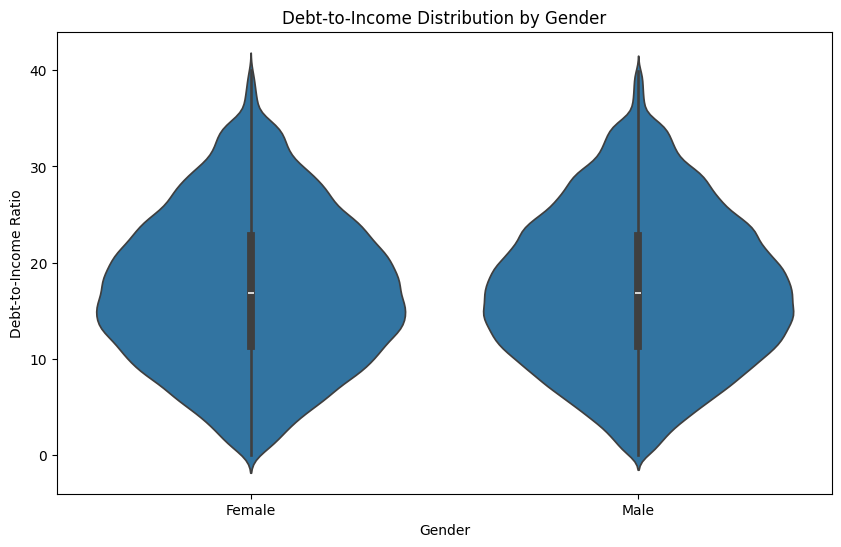

In [19]:
# Violin plot of Debt-to-Income by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Debt_To_Income', data=df)
plt.title('Debt-to-Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

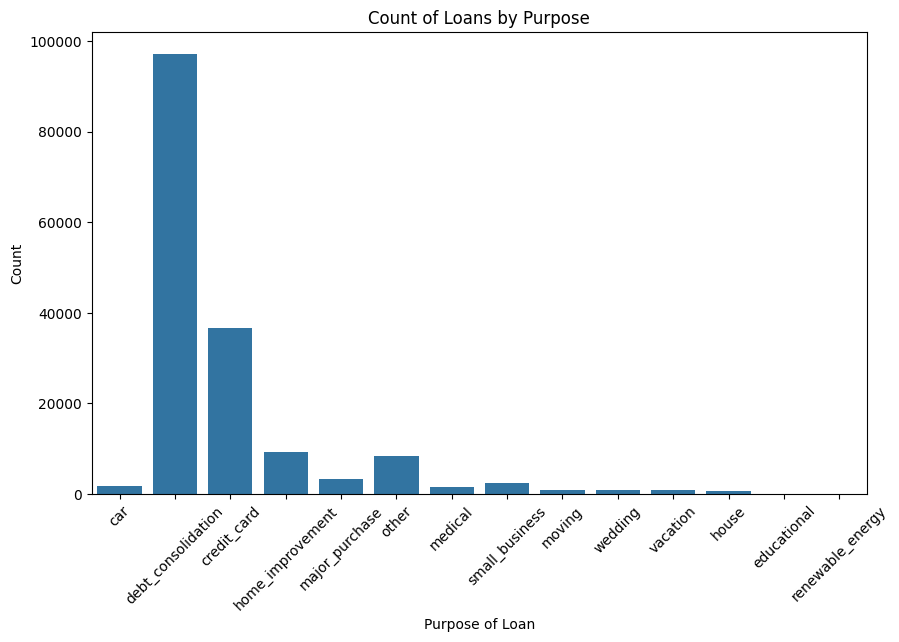

In [20]:
# Bar plot of Purpose of Loan
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose_Of_Loan', data=df)
plt.title('Count of Loans by Purpose')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

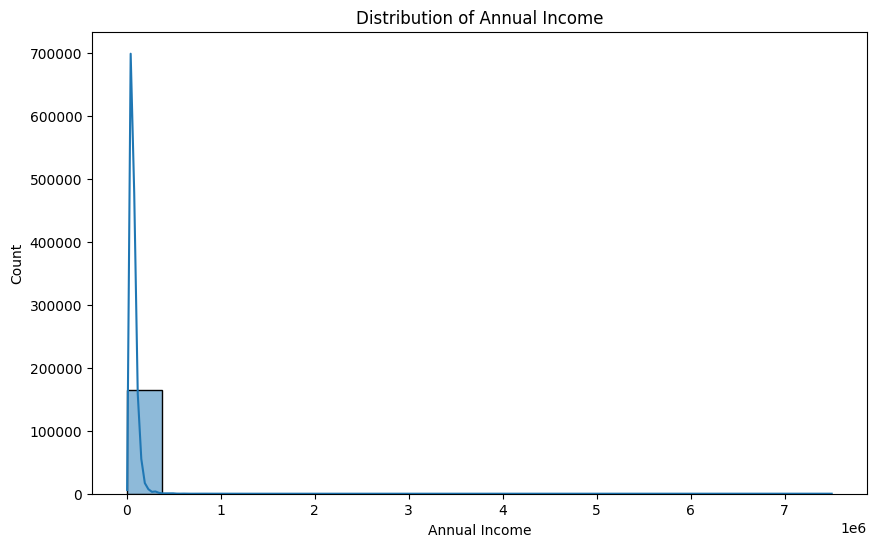

In [21]:
# Histogram of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

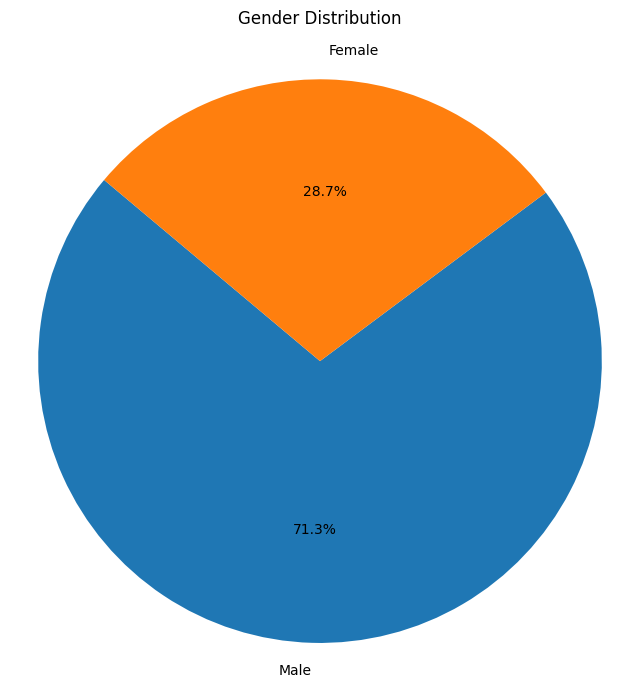

In [22]:
# Pie chart of Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution\n')
plt.axis('equal')
plt.show()

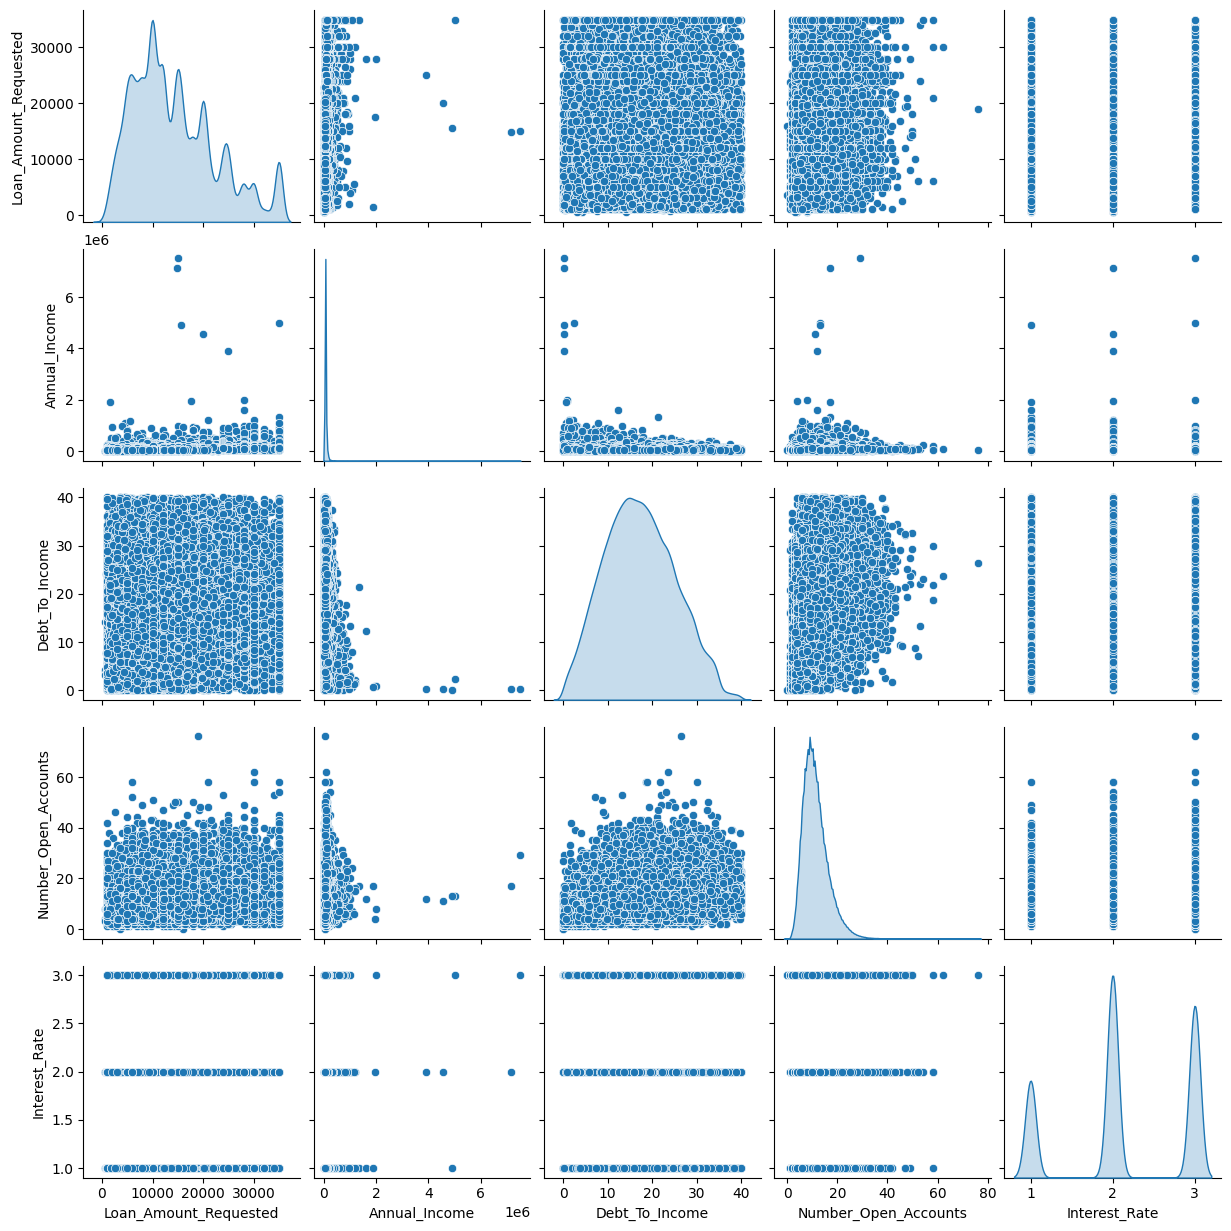

In [23]:
# Pairplot of numerical variables
sns.pairplot(df[['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income', 'Number_Open_Accounts', 'Interest_Rate']], diag_kind='kde')
plt.show()

# **Feature Engineering**

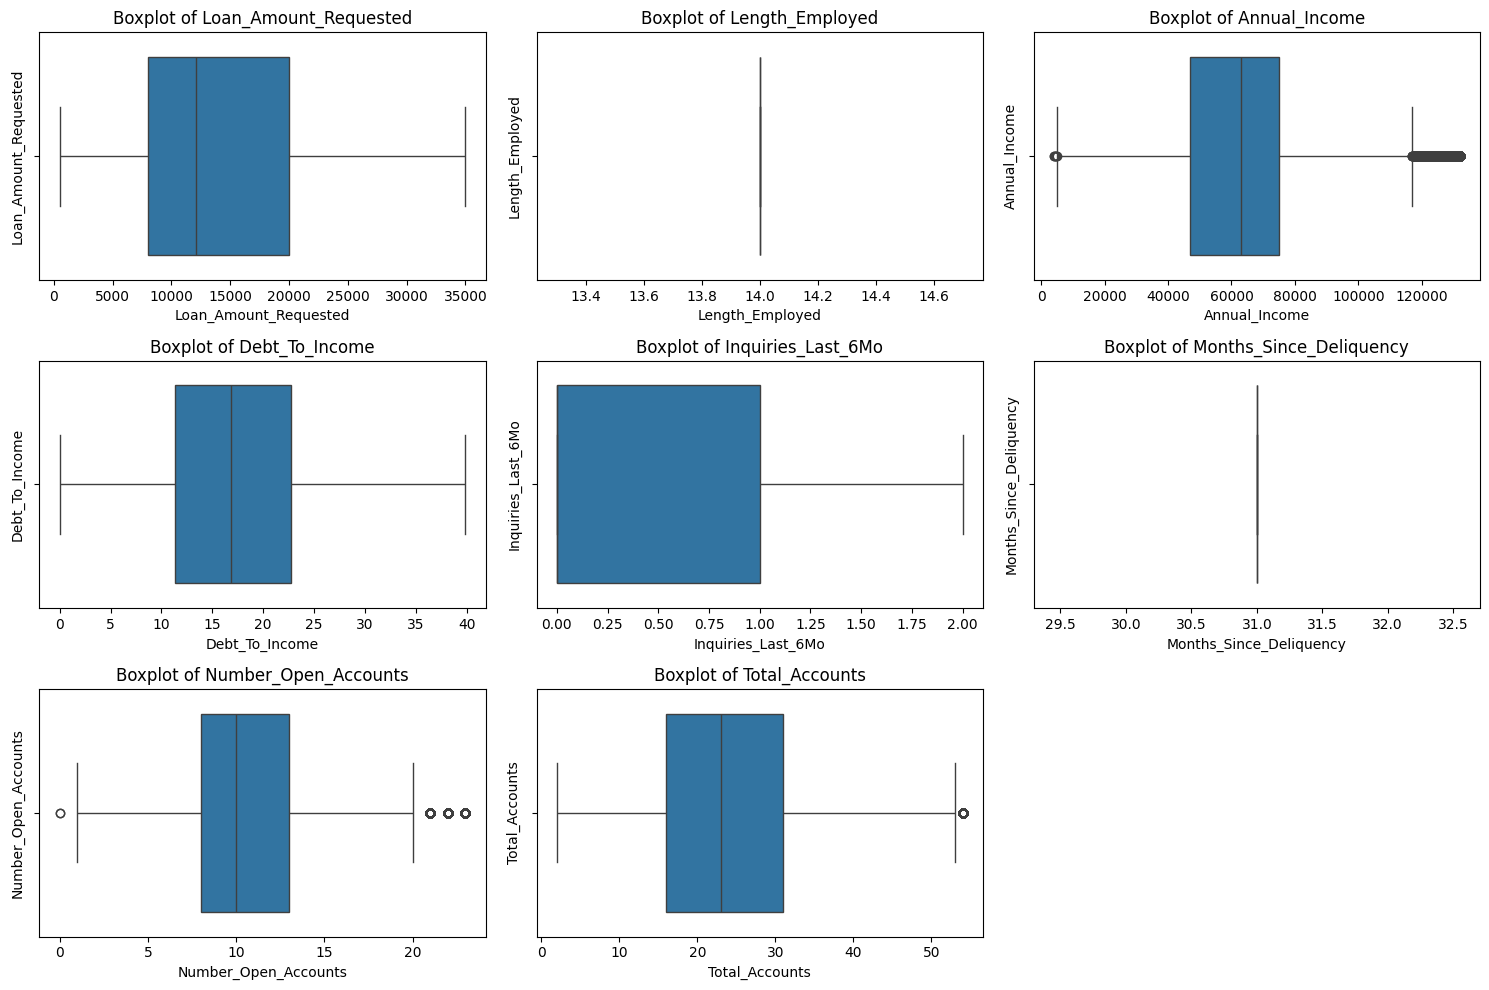

In [24]:
# Removing outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# List of numerical columns
numerical_cols = ['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
                  'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
                  'Number_Open_Accounts', 'Total_Accounts']

# Create a figure with subplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    # Remove outliers for the column
    df_no_outliers = remove_outliers(df, col)
    # Plot boxplot without outliers
    sns.boxplot(x=df_no_outliers[col], orient='v')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [25]:
df.drop_duplicates(inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
cat_cols = ['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

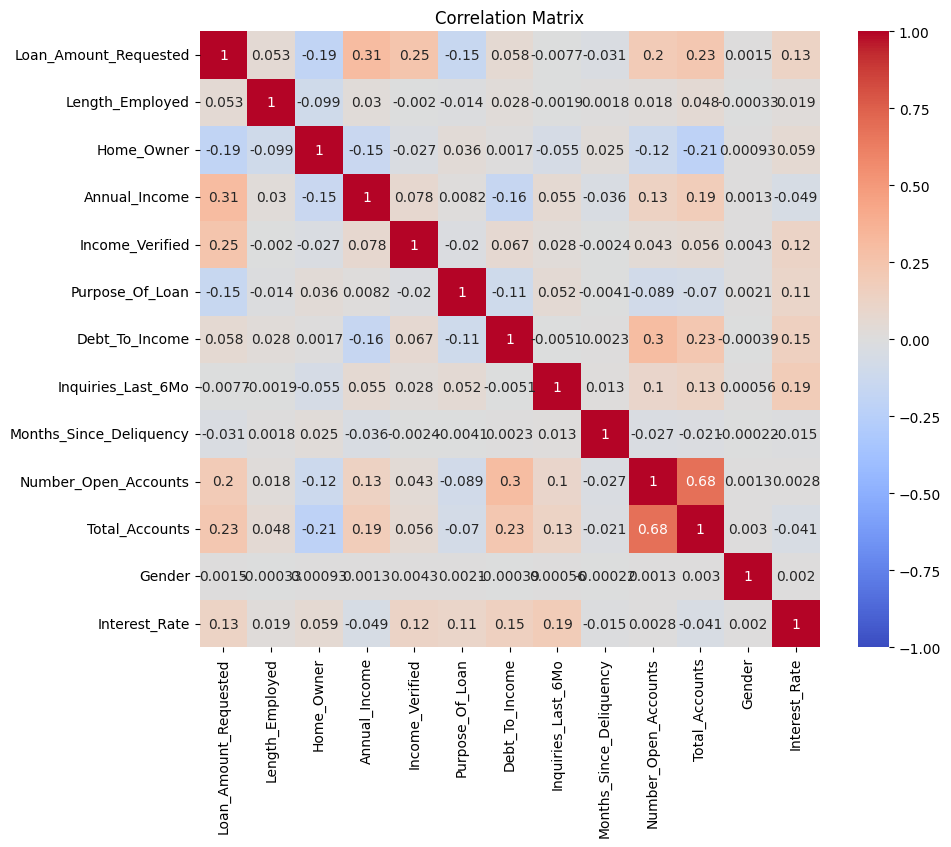

In [28]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **LINEAR REGRESSION**

R-squared: 0.13
Root Mean Squared Error (RMSE): 0.69
Mean Squared Error (MSE): 0.48
Mean Absolute Percentage Error (MAPE): 0.35


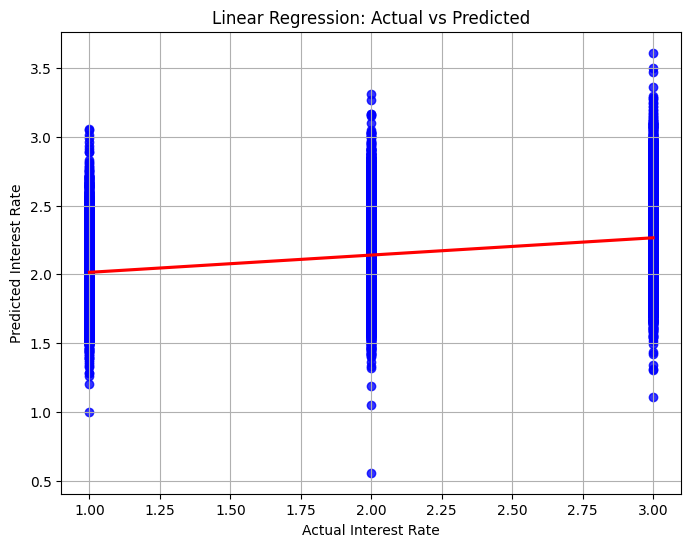

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Separate features and target variable
X = df.drop('Interest_Rate', axis=1)
y = df['Interest_Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')

# Plot scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.grid(True)
plt.show()


# **Random Forest**

R-squared: 0.17
Root Mean Squared Error (RMSE): 0.67
Mean Squared Error (MSE): 0.45
Mean Absolute Percentage Error (MAPE): 0.33


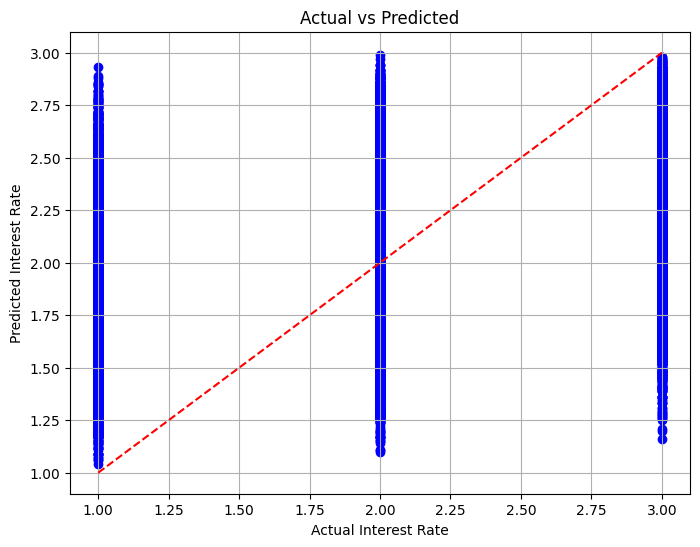

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.grid(True)
plt.show()

# **XGBOOST**

R-squared: 0.21
Root Mean Squared Error (RMSE): 0.66
Mean Squared Error (MSE): 0.43
Mean Absolute Percentage Error (MAPE): 0.32


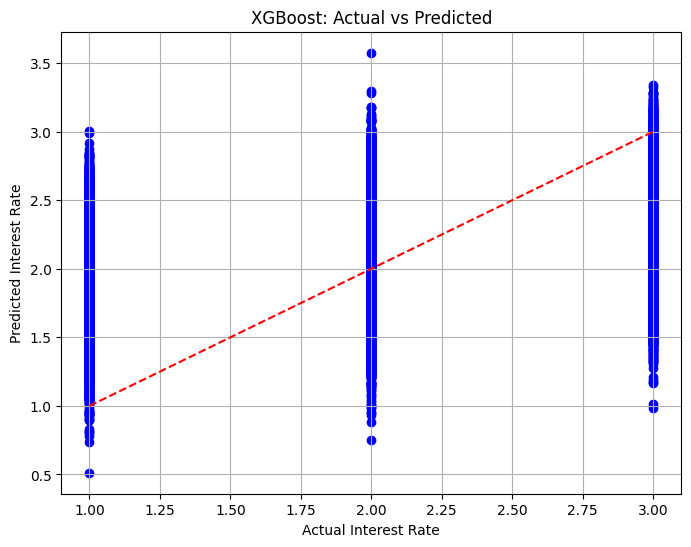

In [31]:
from xgboost import XGBRegressor

# Initialize XGBRegressor model
model = XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.grid(True)
plt.show()

# **GBM**

R-squared: 0.21
Root Mean Squared Error (RMSE): 0.66
Mean Squared Error (MSE): 0.43
Mean Absolute Percentage Error (MAPE): 0.33


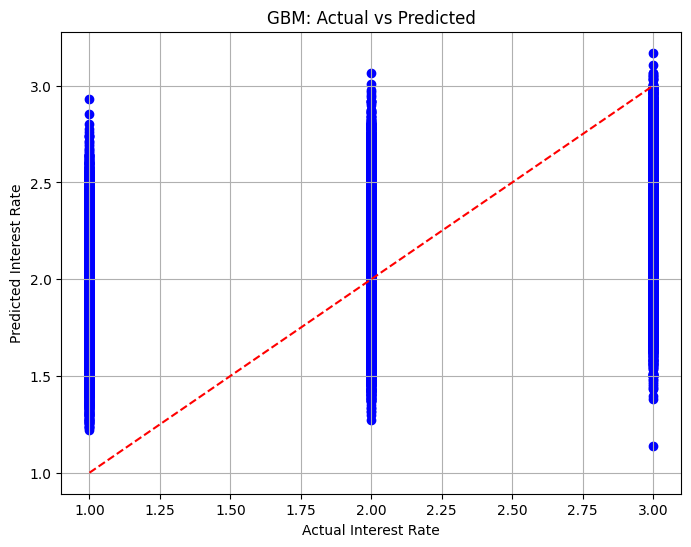

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GBM model
model = GradientBoostingRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R-squared: {r2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('GBM: Actual vs Predicted')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.grid(True)
plt.show()

In [36]:
X.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender'],
      dtype='object')

In [33]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [40]:
import joblib
from sklearn.preprocessing import LabelEncoder
import pandas as pd  # Make sure pandas is imported for DataFrame usage

# Load the trained model
model = joblib.load('xgboost_model.pkl')


def get_user_input():
    Loan_Amount_Requested = int(input("Enter Loan Amount in Rupees : "))
    Length_Employed = int(input("Enter Work Experience in Years : "))
    Home_Owner = input("Enter Home Owner status (e.g., Rent, Mortgage, Own): ")
    Income_Verified = input("Enter Income Verification status (e.g., NOT VERIFIED, VERIFIED - income, VERIFIED - income source): ")
    Purpose_Of_Loan = input("Enter Purpose of Loan (e.g., car, debt_consolidation, credit_card): ")
    Gender = input("Enter Gender (e.g., Male, Female): ")
    Annual_Income = float(input("Enter Annual Income: "))
    Debt_To_Income = float(input("Enter Debt to Income ratio: "))
    Inquiries_Last_6Mo = int(input("Enter Inquiries in Last 6 Months: "))
    Months_Since_Deliquency = int(input("Enter Months Since Delinquency: "))
    Number_Open_Accounts = int(input("Enter Number of Open Accounts: "))
    Total_Accounts = int(input("Enter Total Accounts: "))

    return {
        'Loan_Amount_Requested': Loan_Amount_Requested,
        'Length_Employed': Length_Employed,
        'Home_Owner': Home_Owner,
        'Annual_Income': Annual_Income,
        'Income_Verified': Income_Verified,
        'Purpose_Of_Loan': Purpose_Of_Loan,
        'Debt_To_Income': Debt_To_Income,
        'Inquiries_Last_6Mo': Inquiries_Last_6Mo,
        'Months_Since_Deliquency': Months_Since_Deliquency,
        'Number_Open_Accounts': Number_Open_Accounts,
        'Total_Accounts': Total_Accounts,
        'Gender': Gender,  # Include Gender in the dictionary
    }

def preprocess_input(user_input):
    user_df = pd.DataFrame([user_input])

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to categorical columns
    cat_cols = ['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']
    for col in cat_cols:
        user_df[col] = label_encoder.fit_transform(user_df[col])

    return user_df

# Get user input
user_input = get_user_input()

# Preprocess the input
processed_input = preprocess_input(user_input)

# Predict the interest rate
prediction = model.predict(processed_input)

print(f"Predicted Loan Interest Rate: {prediction[0]:.2f}")


Enter Loan Amount in Rupees : 89000
Enter Work Experience in Years : 7
Enter Home Owner status (e.g., Rent, Mortgage, Own): Rent
Enter Income Verification status (e.g., NOT VERIFIED, VERIFIED - income, VERIFIED - income source): NOT VERIFIED
Enter Purpose of Loan (e.g., car, debt_consolidation, credit_card): debt_consolidation
Enter Gender (e.g., Male, Female): Male
Enter Annual Income: 345000
Enter Debt to Income ratio: 14.5
Enter Inquiries in Last 6 Months: 1
Enter Months Since Delinquency: 4
Enter Number of Open Accounts: 4
Enter Total Accounts: 5
Predicted Loan Interest Rate: 2.39
